=== 장기 수익률 기준 홍준표 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
토탈소프트뱅크     0.367877
동방선기        0.342489
휴맥스홀딩스      0.326535
한국선재        0.275879
두올산업        0.149321
세우글로벌       0.038877
홈센타홀딩스      0.015250
보광산업       -0.006511
영화금속       -0.066759
Name: KODEX200, dtype: float64


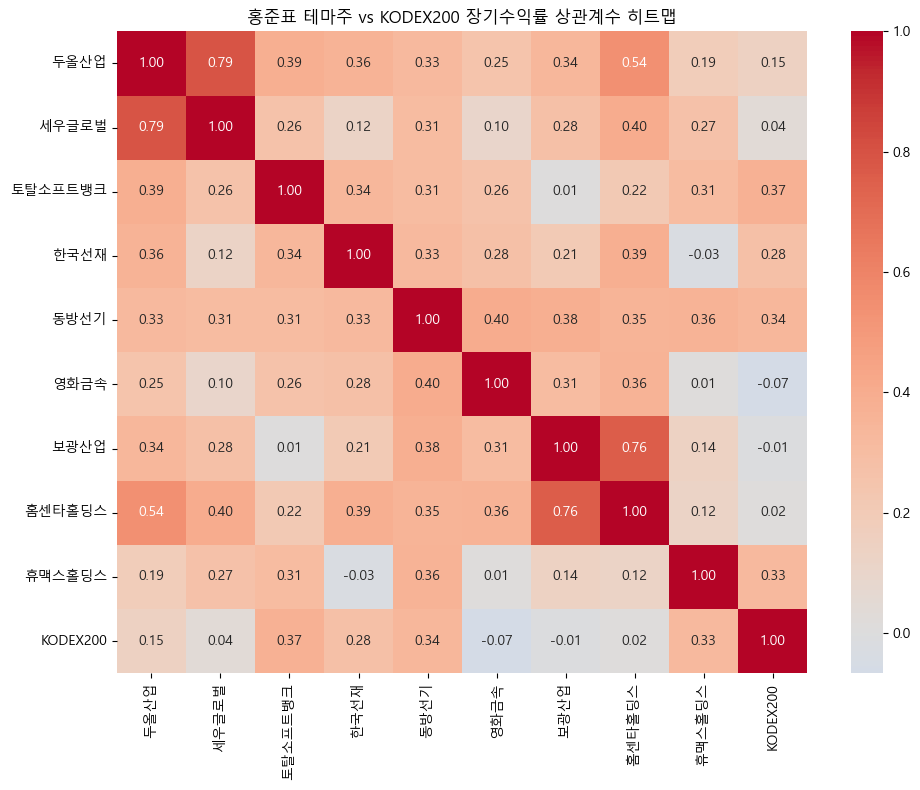

In [1]:
import FinanceDataReader as fdr
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

# 날짜 설정
start_date = '2017-03-30' #선거날 - 40
end_date = '2017-06-17' # 선거날 +40

label_dict = {
    'thema1': '두올산업',
    'thema2': '세우글로벌',
    'thema3': '토탈소프트뱅크',
    'thema4': '한국선재',
    'thema5': '동방선기',
    'thema6': '영화금속',
    'thema7': '보광산업',
    'thema8': '홈센타홀딩스',
    'thema9': '휴맥스홀딩스'
}

# 테마주 종가 수집
thema = pd.DataFrame()
thema['thema1'] = fdr.DataReader('078590', start=start_date, end=end_date)['Close']
thema['thema2'] = fdr.DataReader('013000', start=start_date, end=end_date)['Close']
thema['thema3'] = fdr.DataReader('045340', start=start_date, end=end_date)['Close']
thema['thema4'] = fdr.DataReader('025550', start=start_date, end=end_date)['Close']
thema['thema5'] = fdr.DataReader('099410', start=start_date, end=end_date)['Close']
thema['thema6'] = fdr.DataReader('012280', start=start_date, end=end_date)['Close']
thema['thema7'] = fdr.DataReader('225530', start=start_date, end=end_date)['Close']
thema['thema8'] = fdr.DataReader('060560', start=start_date, end=end_date)['Close']
thema['thema9'] = fdr.DataReader('028080', start=start_date, end=end_date)['Close']

thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

kodex = fdr.DataReader('069500', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

thema_returns_named['KODEX200'] = kodex_return

correlation_matrix = thema_returns_named.corr()

print("=== 장기 수익률 기준 홍준표 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("홍준표 테마주 vs KODEX200 장기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
